# Overview

This project is going to be looking at how well certain groups perform at the SAT i.e  investigating possible relationships between SAT scores and demographics. I would explore:

- Link between (female_per)Female percentage percentage and SAT scores in schools

- Link between AP test takers and SAT scores

- Link between ethnic demographics[e.g Hispanics] and SAT scores in schools

- Link between how student percieved school safety and SAT scores in schools

I used the high schools in New York city for this analysis.


## Sections
1. Data Cleaning

2. Combining cleaned data

3. Analyzing and Visualizing the Data


## Data Sets used
1. ap_2010.csv - Data on AP test results <https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e>

2. class_size.csv - Data on class size <https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3>

3. demographics.csv - Data on demographics <https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j>

4. graduation.csv - Data on graduation outcomes <https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a>

5. hs_directory.csv - A directory of high schools <https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2>

6. sat_results.csv - Data on SAT scores <https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4>

7. survey_all.txt - Data on surveys from all schools <https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8>

8. survey_d75.txt - Data on surveys from New York City district 75 <https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8>




# Data Cleaning 
After studying the data i realised that each school has a unique 'DBN' code and set about identifying this code from each dataset that was read in.

## Dealt with:
1. Reading the files into a dictionary 

2. Identifying a unique code(comprised of 'CSD' and 'School Code') for schools and locating them in each dataset

3. Adding the longitude and latitude of each school as a new column

4. Calculating the total average SAT score for each school



### Read in the data

In [17]:
import pandas as pd
import numpy
import re

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d
    

### Read in the surveys

In [18]:
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)

#survey["DBN"] = survey["dbn"]



In [19]:
#changing the name 'dbn' to DBN' so that it can be consistent with other
survey['DBN'] = survey['dbn']
#based on the dictionary of useful columns form the download page
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

survey = survey[survey_fields]

#moving it into data dictionary 
data['survey'] = survey
data['survey'].head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


### Add DBN columns

In [20]:
#renaming 'dbn' column to 'DBN in hs_directory
data['hs_directory']['DBN'] = data['hs_directory']['dbn'] 
data['class_size'].columns

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO'],
      dtype='object')

In [21]:
#combining two colums('padded_csd', 'SCHOOL CODE') together to make the DBN column

def pad_csd(col):
    col = str(col)
    if len(col) < 2:
        #adds 0 to the front to make it two values
        col = col.zfill(2)
    return col
        
data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(pad_csd)

#Use the addition operator (+) along with the padded_csd and SCHOOL CODE
data['class_size']['DBN'] =  data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE'] 

#print head
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


### Convert columns to numeric

In [22]:
#Adding all the 3 Sat scores to one total value
#errors="coerce" :- treats any string that cant be converted to numbers as a missing value
#pd.to_numeric(errors="coerce")

#This deals with the numeric conversion
data['sat_results']['SAT Math Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Math Avg. Score'], errors="coerce")
data['sat_results']['SAT Critical Reading Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Critical Reading Avg. Score'], errors="coerce")
data['sat_results']['SAT Writing Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Writing Avg. Score'], errors="coerce")

#this deals with the addition
data['sat_results']['sat_score'] = data['sat_results']['SAT Math Avg. Score'] + data['sat_results']['SAT Critical Reading Avg. Score'] + data['sat_results']['SAT Writing Avg. Score'] 

data['sat_results']['sat_score'].max()
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [23]:
#parsing the latitude and longitude coordinates for each school from data['hs_directory']['Location 1']
import re
#re.findall("\(.+\)", "1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)")

#returns the Latitude 
def latitude(column):
    cordinate = re.findall("\(.+\)", column)
    lat = cordinate[0].split(',')[0].replace('(','')
    return lat

#returns the longitude
def longitude(column):
    cordinate = re.findall("\(.+\)", column)
    long = cordinate[0].split(',')[1].replace('(','')
    long = long.replace(')','')
    return long

#calling the longitude and latitude functions
data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(latitude)
data['hs_directory']['long'] = data['hs_directory']['Location 1'].apply(longitude)

#converting the longitude and latitude to integers
data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'], errors='coerce')
data['hs_directory']['long'] = pd.to_numeric(data['hs_directory']['long'],errors='coerce')


data['hs_directory'].head()

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,DBN,lat,long
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548,40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",09X543,40.827603,-73.904475
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",09X327,40.842414,-73.916162
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",02M280,40.710679,-74.000807
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40...",28Q680,40.718810,-73.806500


# Combining Cleaned Data

### Condense datasets

In [24]:
#we're dealing with high schools, we're only concerned with grades 9 through 12. 
#That is where the value in the GRADE column is '09-12'.
data['class_size'] = data['class_size'][data['class_size']['GRADE '] == '09-12']

#Also i am only concerned with the 'GEN ED' 'PROGRAM TYPE'
data['class_size'] = data['class_size'][data['class_size']['PROGRAM TYPE'] == 'GEN ED']

data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


In [25]:
# next i will be finding the average class size per school
#would need to 

import numpy as np
#groups the class_size data_frame by 'DBN'
data['class_size'] = data['class_size'].groupby('DBN') 

#finds the agregate class_size per 'DBN'
data['class_size'] = data['class_size'].agg(np.mean)

#reseting the index... making the 'DBN' a column again
data['class_size'] = data['class_size'].reset_index()

data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [26]:
#Next lets arrange 'demographics'
#I am interested in the latest data so i would be picking the row which has '20112012'

data['demographics'] = data['demographics'][data['demographics']['schoolyear'] == 20112012]
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


In [27]:
#condense the graduation data set
#Picking the 'Cohort' =  2006 and the Demographic ='Total Cohort' columns

data['graduation'] = data['graduation'][data['graduation']['Cohort'] == '2006']
data['graduation'] = data['graduation'][data['graduation']['Demographic'] == 'Total Cohort']
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,...,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%


### Convert AP scores to numeric

In [28]:
#condense the graduation data set

#list of the columns that need converting
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

#converting the columns to numeric data
for elem in cols:
    data['ap_2010'][elem]= pd.to_numeric(data['ap_2010'][elem],errors='coerce')

print(data['ap_2010'].dtypes)

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object


### Merging data
Will be merging data one by one due to the inconsistencies with data over time

In [29]:
#starting with "sat_results"

combined = data["sat_results"]
#performed left merge on "ap_2010" and "graduation"
combined = combined.merge(data["ap_2010"], how='left')
combined =  combined.merge(data["graduation"], how='left')

#performed inner merge on "class_size" , "demographics", 'survey', 'hs_directory'
to_merge =["class_size" , "demographics", 'survey', 'hs_directory']
for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

combined.head()
combined.shape

(363, 159)

In [30]:
#Will be filling up the empty(NaN) slots with the averages of the column or with 0

#finds the mean
mean = combined.mean() 
#fills the missing data in combined data_frame with the mean
combined = combined.fillna(mean)
#For columns where its all NaN put value 0
combined = combined.fillna(0)
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,long
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to Manhattan students or residents,Then to New York City residents,0,0,0,0,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,0,0,0,0,0,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0,0,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426


### Add a school district column for mapping

In [31]:
#Extracting the school district; which is the first 2 values of 'DBN' code

def school_dist_extract(column):
    school_dist_code = column[0:2]
    return school_dist_code

combined['school_dist'] = combined['DBN'].apply(school_dist_extract)
combined['school_dist'].loc[0:15] 

0     01
1     01
2     01
3     01
4     01
5     01
6     02
7     02
8     02
9     02
10    02
11    02
12    02
13    02
14    02
15    02
Name: school_dist, dtype: object

# Analyzing and Visualizing the Data

### Finding correlations

In [32]:
#Note: If r values(correlation) is above .25 or below -.25 that is enough to qualify as interesting.
#The closer to 1 the r value is, the stronger the positive correlation between the two columns. 
#The closer to -1 the r value is, the stronger the negative correlation (i.e., the more "opposite" the columns are). 
#The closer to 0, the weaker the correlation.

#Using the dataframe.corr() method to check correlations in the combined data_frame
correlations = combined.corr()

#Since i am interested in the relationships of other columns with 'sat_score'( filter out using only 'sat_score')
correlations = correlations['sat_score']

print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

###  Findings So Far

1. There is is an extremely close positive relationship between SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score. This is to be expected as this is what makes up 'sat_score'. 

2. There is strong correlation betwwen 'AP Test Takers' and 'sat_score', this may indicate that those who do AP's tend to do better at their SAT also.

3. 'NUMBER OF STUDENTS / SEATS FILLED', 'SIZE OF LARGEST CLASS', 'total_students' and 'total_enrollment' have a relatively strong correlation which shows that schools with higher number of students may tend to perform better at SAT. This is quite shocking as I was of the opinion that smaller class system makes for better SAT scores.

4. 'SIZE OF SMALLEST CLASS' has a weak correlation with 'sat_score' which further supports the findings in number 3.

5. 'asian_num' and 'asian_per' both show strong correlation which may be interepretred to mean that asian students perform very well at SAT, i.e. schools with high volume of Asians tend to perform better at SAT.

6. 'black_per' shows a small negative correlation which can be interpreted to mean that schools with high number of Blacks may tend to perform lower at the SAT

7. 'hispanic_per' shows a significant negative correlation which can be interpreted to mean that schools with high number of Hispanics may tend to perform lower at the SAT.

8. 'white_num' and 'white_per' both show strong correlation which may be interepretred to mean that white students perform very well at SAT, i.e. schools with high volume of Whites tend to perform better at SAT.

9.  Comparing 'female_num' to 'male_num' shows that shows with higher female population tend to perform bettter. This may mean that females tend to score higher than males on average in the SAT.



- N.B: This is just preliminary findings, more relationships among the columns would be looked at to better understand the data. 

### Finding Relationship Using: Scatter Plots

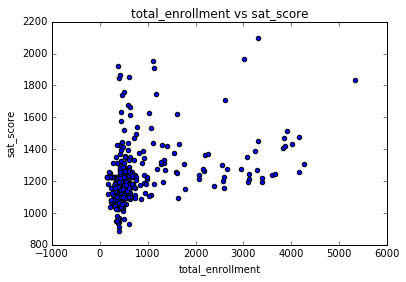

In [33]:
#Exploring the relationship between 'total_enrollment' and 'sat_score'

import matplotlib.pyplot as plt
%matplotlib inline

#combined.plt.scatter(x = combined['total_enrollment'], y= combined['sat_score'])

plt.scatter(x = combined['total_enrollment'], y= combined['sat_score'])

plt.title('total_enrollment vs sat_score')
plt.xlabel('total_enrollment')
plt.ylabel('sat_score')

### Findings So Far

1. The scatter plot above doesnt show much relationship between total_enrollment and sat_score
2. The bottom area(<1000) shows an alignment of sort, its best to investigate and look at what may be the reason

In [34]:
#Looking at schools with <1000 in total_enrollment and sat_score

low_enrollment = combined[ combined['total_enrollment'] < 1000 ]
low_enrollment = low_enrollment[ combined['sat_score'] < 1000 ]

low_enrollment['School Name']

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

### Findings So Far

- After googling the names of this school i found that most of them are English language learning centres for new immigrants which may be the reason they have both low total_enrollment and sat_score

- This then leads to the question, is there a link between English language leaners(ell_percent) and sat_scores? 

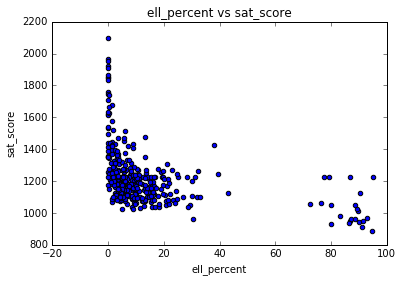

In [35]:
#Looking at link between ell_percent and sat_score

plt.scatter(x= combined['ell_percent'], y= combined['sat_score'])
plt.title('ell_percent vs sat_score')
plt.xlabel('ell_percent')
plt.ylabel('sat_score')

### Map of New York (showing the district density in the 5 boroughs)


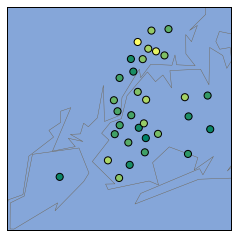

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline

#Draws a map of new York City
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)


#due to the number of schools present its better to agregrate the data by districts and map using that.

districts = combined.groupby('school_dist').agg(np.mean)
#reset_index of districts to make school_dist a column again

districts.reset_index(inplace=True)

# first convert to list
longitudes = districts['long'].tolist()
latitudes = districts['lat'].tolist()

# percentage of English language learners by area.
# using summer colormap: green points for low numbers, and yellow points for high numbers.

m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["ell_percent"], cmap='summer')


#plt.show

### Plotting survey correlations

In [37]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")

### Bar Plot of sat_scores with survey_fields

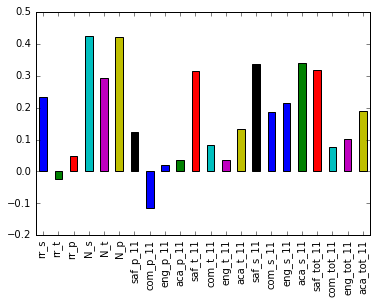

In [38]:
#Bar plot of the correlation between the sat_scores and the fields in the survey

combined.corr()['sat_score'][survey_fields].plot.bar()

### Findings So Far

1. There is a link between the number of parents[N_p] and students[N_p] respondents to the sat_scores. This may show that the more active(responds) students/parents the higher the schools sat_scores. This makes sense as students who feel out surveys are more likely to do well academically also. 

2. Places where the Safety and Respect score[saf_tot_11] where high (on both the student[saf_s_11] response and the teachers[saf_t_11] response) higher sat_scores where noticed. This shows that there may be a link between how safe (and respectful) a school is perceived and how well the school does in SAT. This seems reasonable as it is hard for students to perform well in school in an unsafe environment.

3. There is a link between Academic expectations of students[aca_s_11] and their scores while no link was noted between academic expectation of teachers[aca_t_11] and parents[aca_p_11] 

### Delving Deeper into how teachers and students perceive safety at school and sat_scores

### Scatter Plot

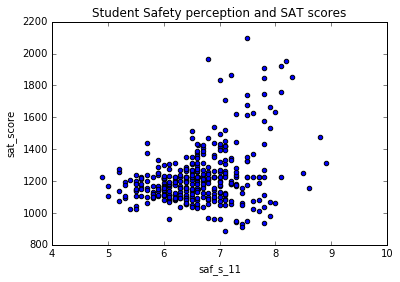

In [39]:
combined.plot.scatter('saf_s_11','sat_score' )
plt.title('Student Safety perception and SAT scores')

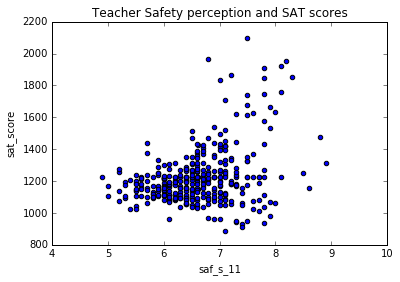

In [40]:
combined.plot.scatter("saf_s_11", "sat_score")
plt.title('Teacher Safety perception and SAT scores')

### Findings So Far

There appears to be a weak correlation between SAT scores and safety. It looks like there are a few schools with extremely high SAT scores and high safety scores. There are a few schools with low safety scores and low SAT scores. No school with a safety score lower than 6.5 has an average SAT score higher than 1500

### Map

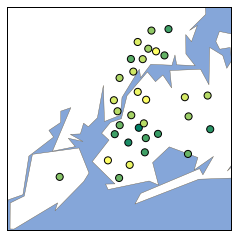

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline

#Draws a map of new York City
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9')

teach=m

#Average by distrcit
district = combined.groupby('school_dist').agg(np.mean)
#reset_index of district to make school_dist a column again
district.reset_index(inplace=True)

# first convert to list
longitude = district['long'].tolist()
latitude = district['lat'].tolist()

# using summer colormap: green points for low numbers, and yellow points for high numbers.
# percieved student school safety by district
m.scatter(longitude, latitude, s=50, latlon=True, zorder=2, c=district['saf_s_11'], cmap='summer')
plt.show()
# percieved teacher school safety by district
#m.scatter(longitude, latitude, s=50, latlon=True, zorder=2, c=district['saf_t_11'], cmap='summer')


### Findings So Far

*This is looking at things from how students view school safety 

1. Staten Highland has just one district information. This shows a light green colour which means its moderatley safe.

2. Brooklyn has a lot of yellow districts showing that students see their schools has a very safe place

3. looks like parts of qeeuns has a very low safety scores 

4. Manhattan and The Bronx seem to have average safety scores


### Investigating racial differences in SAT scores

1. Whites: white_per

2. Asians: asian_per

3. Blacks: black_per

4. Hispanics: hispanic_per

### Bar Plot

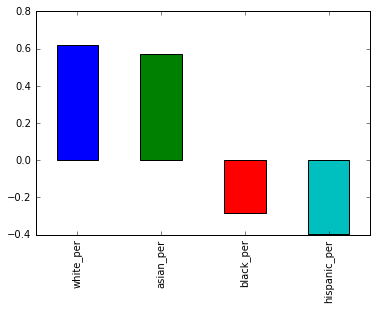

In [42]:
race_column = ['white_per', 'asian_per', 'black_per', 'hispanic_per']

combined.corr()['sat_score'][race_column].plot.bar()

### Findings So Far

This shows that schools with higher population of Asians and Whites tend to do better at SAT than schools with higher population of Blacks and Hispanics.

Resaon why this is so can be explored further 

### Scatter Plot

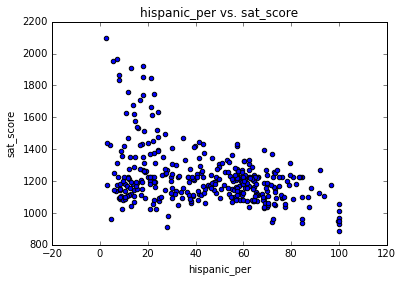

In [43]:
#hispanic_per vs. sat_score.
combined.plot.scatter('hispanic_per','sat_score' )
plt.title('hispanic_per vs. sat_score')

### Findings So Far

- The scatter diagram shows some schools with less small hispanic population scoring high SAT scores. 

- Schools with 100% Hispanic student score less than 1100 in SAT. 

- Surprisingly a lot of schools with hispanic population of less than 20% score no more than 1200.

- It looks like a lot of schols with at least half the population been hispanic score between 1000-1300 


In [44]:
#Researching schools with a hispanic_per greater than 95%
hispanic_greater = combined[combined['hispanic_per'] > 95]
hispanic_greater

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,long,school_dist
44,02M542,MANHATTAN BRIDGES HIGH SCHOOL,66,336.0,378.0,344.0,1058.0,Manhattan Bridges High School,67.000000,102.000000,...,0,0,0,0,0,0,"525 West 50Th Street\nNew York, NY 10019\n(40....",40.765027,-73.992517,02
82,06M348,WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL,70,380.0,395.0,399.0,1174.0,0,129.028846,197.038462,...,Then to New York City residents,0,0,0,0,0,"511 West 182Nd Street\nNew York, NY 10033\n(40...",40.848879,-73.930807,06
89,06M552,GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...,56,339.0,349.0,326.0,1014.0,GREGORIO LUPERON HS SCI & MATH,88.000000,138.000000,...,0,0,0,0,0,0,"501 West 165Th\nNew York, NY 10032\n(40.838032...",40.838032,-73.938371,06
125,09X365,ACADEMY FOR LANGUAGE AND TECHNOLOGY,54,315.0,339.0,297.0,951.0,Academy for Language and Technology,20.000000,20.000000,...,0,0,0,0,0,0,"1700 Macombs Road\nBronx, NY 10453\n(40.849102...",40.849102,-73.916088,09
141,10X342,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,49,300.0,333.0,301.0,934.0,International School for Liberal Arts,55.000000,73.000000,...,0,0,0,0,0,0,"2780 Reservoir Avenue\nBronx, NY 10468\n(40.87...",40.870377,-73.898163,10
176,12X388,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,30,321.0,351.0,298.0,970.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"1300 Boynton Avenue\nBronx, NY 10472\n(40.8313...",40.831366,-73.878823,12
253,19K583,MULTICULTURAL HIGH SCHOOL,29,279.0,322.0,286.0,887.0,Multicultural High School,44.000000,44.000000,...,0,0,0,0,0,0,"999 Jamaica Avenue\nBrooklyn, NY 11208\n(40.69...",40.691144,-73.868426,19
286,24Q296,PAN AMERICAN INTERNATIONAL HIGH SCHOOL,55,317.0,323.0,311.0,951.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"45-10 94Th Street\nElmhurst, NY 11373\n(40.743...",40.743303,-73.870575,24


### Findings So Far

- Checked out this schools on Google for more information 

- Looking at this schools it can be noted that the average SAT score is less than 1000 (992.4)

- Most of this schools were setup to cater for new immigrants from hispanic and latino countires.

- A lot of students here are just learning English which can be a reason for the low SAT scores

- After more research on this schools it can be noted that a lot of the students are from 'Economically Disadvantaged' backgrounds.

In [45]:
#Researching schools with a hispanic_per less than 10% and SAT score > 1800
hispanic_less = combined[combined['hispanic_per'] < 10]
hispanic_less = hispanic_less[hispanic_less['sat_score'] > 1800] 
hispanic_less

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,long,school_dist
37,02M475,STUYVESANT HIGH SCHOOL,832,679.0,735.0,682.0,2096.0,STUYVESANT HS,1510.0,2819.0,...,0,0,0,0,0,0,"345 Chambers Street\nNew York, NY 10282\n(40.7...",40.717746,-74.014049,02
151,10X445,BRONX HIGH SCHOOL OF SCIENCE,731,632.0,688.0,649.0,1969.0,BRONX HS OF SCIENCE,1190.0,2435.0,...,0,0,0,0,0,0,"75 West 205 Street\nBronx, NY 10468\n(40.87705...",40.877056,-73.889780,10
187,13K430,BROOKLYN TECHNICAL HIGH SCHOOL,1277,587.0,659.0,587.0,1833.0,BROOKLYN TECHNICAL HS,2117.0,3692.0,...,0,0,0,0,0,0,"29 Ft Greene Place\nBrooklyn, NY 11217\n(40.68...",40.688107,-73.976745,13
327,28Q687,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,121,612.0,660.0,596.0,1868.0,Queens HS for Science York Colllege,215.0,338.0,...,0,0,0,0,0,0,"94-50 159 Street\nJamaica, NY 11433\n(40.70099...",40.700999,-73.798154,28
356,31R605,STATEN ISLAND TECHNICAL HIGH SCHOOL,227,635.0,682.0,636.0,1953.0,STATEN ISLAND TECHNICAL HS,528.0,905.0,...,0,0,0,0,0,0,"485 Clawson Street\nStaten Island, NY 10306\n(...",40.567913,-74.115362,31


### Findings So Far

- Checked out this schools on Google for more information 

SAT scores of at least 1800:- [Staten Island Technical High School, Bronx High School of Science, Stuyvesant High School, Brooklyn Technical High School, Queens High School for the Sciences at York College...]

- Schools in this list with a SAT score of at least 1800 most times had an Asian majority in the school with the hispanic population been no more than 5%. 

- A lot of schools with SAT scores of at least 1800 were technical or science schools.

- It can be assumed that they recieve more funding since they are technically inclined


In [46]:
#black_per vs. sat_score.

#plt.scatter(combined['black_per'],combined['sat_score'])
#plt.title('black_per vs. sat_score')

In [47]:
#asian_per vs. sat_score.

#plt.scatter(combined['asian_per'],combined['sat_score'])
#plt.title('asian_per vs. sat_score')

In [48]:
#white_per vs. sat_score.

#combined.plot.scatter('white_per','sat_score')
#plt.title('white_per vs. sat_score')

### Investigating gender differences in SAT scores
- Male: male_per
- Female: female_per

### Bar plot

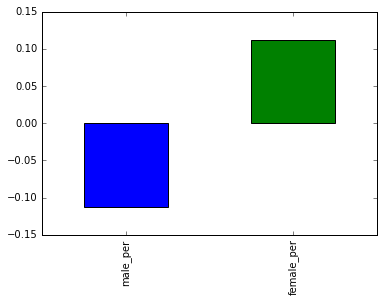

In [49]:
gender = ['male_per','female_per']
combined.corr()['sat_score'][gender].plot.bar()

### Findings So Far 

- Since the value for correlation (r) is less than 2.0 for both sides it can be ignored.

This shows very weak correlation between gender and SAT scores.

### Scatter Plot

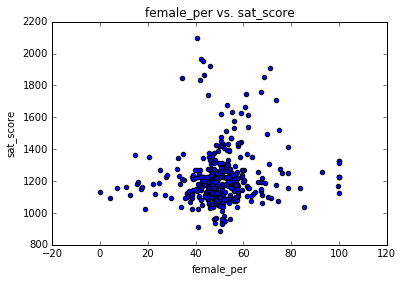

In [50]:
#Investigating females in school
combined.plot.scatter('female_per','sat_score')
plt.title('female_per vs. sat_score')

### Findings So Far

- Checked out this schools on Google for more information 

- Schools with a female population of between 40% - 60% score majorly between 1000- 1400 in SAT

- Some schools with a 50% gender split score above 1800 while some score below 1000 but this is not a common phenomenon.

- Schools with a 100% female split score between 110-1350



In [51]:
#Researching schools with a female_per greater than 60% and SAT score > 1700
female_greater = combined[(combined['female_per'] > 60) & (combined['sat_score'] > 1700)] 
female_greater

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,long,school_dist
5,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624.0,604.0,628.0,1856.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"525 East Houston Street\nNew York, NY 10002\n(...",40.718962,-73.976066,01
26,02M416,ELEANOR ROOSEVELT HIGH SCHOOL,127,572.0,594.0,592.0,1758.0,Eleanor Roosevelt High School,155.000000,235.000000,...,0,0,0,0,0,0,"411 East 76 Street\nNew York, NY 10021\n(40.77...",40.770116,-73.953379,02
60,03M479,BEACON HIGH SCHOOL,261,577.0,575.0,592.0,1744.0,BEACON SCHOOL,166.000000,197.000000,...,0,0,0,0,0,0,"227-243 West 61St Street\nNew York, NY 10023\n...",40.772158,-73.987797,03
61,03M485,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...,531,566.0,564.0,577.0,1707.0,FIORELLO H.LAGUARDIA HS,691.000000,1236.000000,...,0,0,0,0,0,0,"100 Amsterdam Avenue\nNew York, NY 10023\n(40....",40.773671,-73.985269,03
302,25Q525,TOWNSEND HARRIS HIGH SCHOOL,278,621.0,651.0,638.0,1910.0,TOWNSEND HARRIS HS,613.000000,796.000000,...,0,0,0,0,0,0,"149-11 Melbourne Avenue\nFlushing, NY 11367\n(...",40.734408,-73.821417,25


### Findings So Far

- Checked out this schools on Google for more information 

- This schools are very selective and have a low acceptance rate but provide top notch education

- Very few of the students (<50%) are classified as 'Economically Disadvantaged'


### Investigating difference AP test makes in SAT scores


In [52]:
#percentage of students in each school that took an AP exam.

combined['ap_per'] = (combined['AP Test Takers ']/  combined['total_enrollment'])*100
combined['ap_per'].head()

0    30.575556
1     9.898477
2     3.177258
3    35.157724
4    15.809051
Name: ap_per, dtype: float64

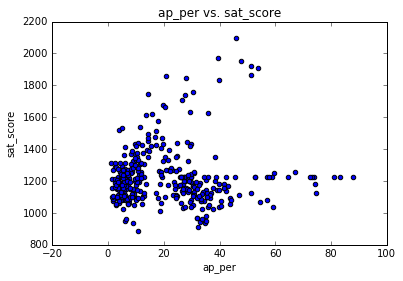

In [53]:
combined.plot.scatter('ap_per','sat_score')
plt.title('ap_per vs. sat_score')

### Findings So Far

- There appears to be only a weak correlation between the percentage of students who took AP test and their SAT scores. 

### Extra Analysis Left to do

- Determing wheter there's a correlation between class size and SAT scores
- Figuring out which neighborhoods have the best schools
    - If we combine this information with a dataset containing property values, we could find the least expensive neighborhoods that have good schools.
- Investigating the differences between parent, teacher, and student responses to surveys.
- Assigning scores to schools based on sat_score and other attributes.